In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# FIX ME: Root dir as argument
root_dir = "../../../data/picklerCheckpoints/"
is_compressed = True;

In [2]:
!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install imblearn
import nbimporter
import Preprocessing.SpatialMapping as sm
import Preprocessing.Discretization as dis
import time
import math
import seaborn as sns
plt.rcParams.update({'font.size': 22})

You should consider upgrading via the 'D:\python\python.exe -m pip install --upgrade pip' command.


Importing Jupyter notebook from D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\Preprocessing\SpatialMapping.ipynb
Importing Jupyter notebook from D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\commons\utility\pickle_util.ipynb
Importing Jupyter notebook from D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\Preprocessing\DataEnrichment.ipynb
Importing Jupyter notebook from D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\Preprocessing\Discretization.ipynb


In [3]:
data = sm.run(['apr', 'may', 'jun', 'jul', 'aug'])

Data for the month :apr Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-apr14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-apr14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Data for the month :may Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-may14.p
Decompressing ../data/picklerCheckpoints/spatialJoinData/uber-spatial-data-may14.p.pbz2..............Done
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Data for the month :jun Found.....
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading file

In [4]:
df = data.copy()
columns = ['datetime', 'zone', 'weatherCondition', 'humidity', 'pressure', 'temperature', 'windDirection', 'windSpeed', 'holiday']

In [5]:
df2 = df[columns]
df2g = dis.encode(df2, ['zone', 'weatherCondition', 'holiday'])
df2g = df2.groupby(columns).size().reset_index(name='counts')
df2g['datetime'] = pd.to_datetime(df2g['datetime'], format='%m-%d-%Y:%H').apply(lambda x: time.mktime(x.timetuple()))

D:\Academics\MLRepoFeb\ML2020-Uber-Data-Analysis\Preprocessing\Discretization.ipynb:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "metadata": {},


Result Saved in ../data/encodedMappings/zone.p
Result Saved in ../data/encodedMappings/weatherCondition.p
Result Saved in ../data/encodedMappings/holiday.p


In [6]:
from sklearn.preprocessing import MinMaxScaler
counts = df2g['counts'].copy()
datetime = df2g['datetime'].copy()

In [7]:
df2g

,datetime,zone,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,counts
0,1.396291e+09,10,15,40.0,1016.0,282.96,330.0,5.0,1,3
1,1.396291e+09,11,15,40.0,1016.0,282.96,330.0,5.0,1,1
2,1.396291e+09,14,15,40.0,1016.0,282.96,330.0,5.0,1,2
3,1.396291e+09,22,15,40.0,1016.0,282.96,330.0,5.0,1,1
4,1.396291e+09,25,15,40.0,1016.0,282.96,330.0,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...
486661,1.409506e+09,251,10,88.0,1015.0,298.53,0.0,2.0,2,3
486662,1.409506e+09,254,10,88.0,1015.0,298.53,0.0,2.0,2,5
486663,1.409506e+09,255,10,88.0,1015.0,298.53,0.0,2.0,2,7
486664,1.409506e+09,256,10,88.0,1015.0,298.53,0.0,2.0,2,6


In [8]:
bins = [0, 10, 50, np.inf]
names = ['low', 'med', 'high']

df2g['label'] = pd.cut(df2g['counts'], bins, labels=names)

In [9]:
df2g = dis.encode(df2g, ['label'])

Result Saved in ../data/encodedMappings/label.p


In [10]:
class0, class1, class2 = df2g['label'].value_counts()

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=101)

In [12]:
x_ros, y_ros = ros.fit_resample(df2g[columns], df2g['label'])
df3 = x_ros
df3['label'] = y_ros

In [13]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df3) 
df3.loc[:,:] = scaled_values
df3['counts'] = counts
df3['datetime'] = datetime

In [14]:
x_ros

,datetime,zone,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday,label,counts
0,1.396291e+09,0.155642,0.727273,0.600000,0.510638,0.107153,0.805556,0.250000,0.5,0.0,3
1,1.396291e+09,0.525292,0.727273,0.600000,0.510638,0.107153,0.805556,0.250000,0.5,0.0,1
2,1.396291e+09,0.894942,0.727273,0.600000,0.510638,0.107153,0.805556,0.250000,0.5,0.0,2
3,1.396291e+09,1.000000,0.727273,0.600000,0.510638,0.107153,0.805556,0.250000,0.5,0.0,1
4,1.396291e+09,0.155642,0.727273,0.655556,0.510638,0.080510,0.833333,0.250000,0.5,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
97003,1.399307e+09,0.536965,0.681818,0.788889,0.276596,0.870258,0.847222,0.000000,0.5,1.0,1
97004,1.399307e+09,0.883268,0.681818,0.333333,0.361702,0.897480,0.166667,0.083333,0.5,1.0,41
97005,1.399307e+09,0.533074,0.409091,0.400000,0.425532,0.349262,0.888889,0.666667,1.0,1.0,1
97006,1.399307e+09,0.459144,0.681818,0.566667,0.489362,0.743122,0.361111,0.166667,1.0,1.0,2


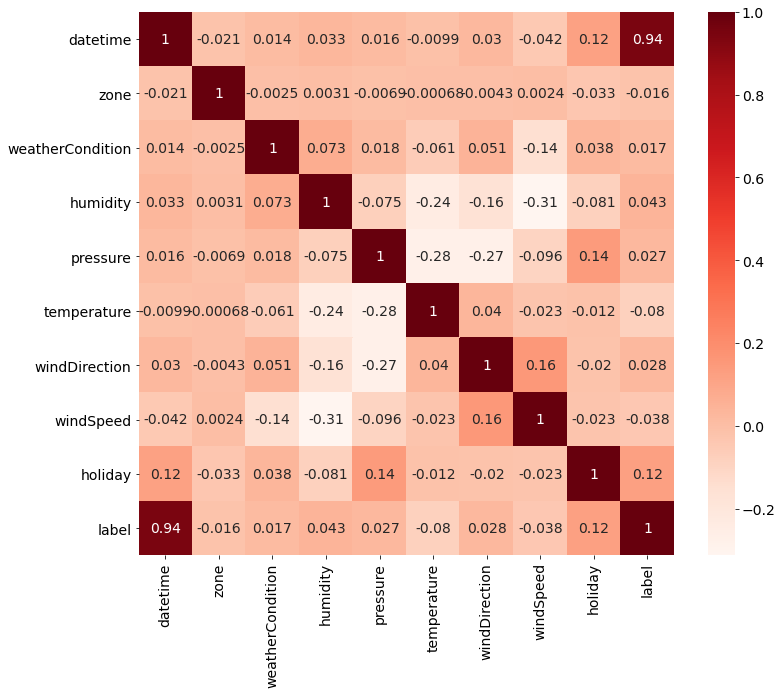

In [15]:
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 14})
corrCols = columns.copy()
corrCols.append('label')
cor = df3[corrCols].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('LinearRegression/LR-2-Correlation.png')
plt.show()

In [16]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

datetime    0.943636
label       1.000000
Name: label, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split( df3[columns], df3['label'], test_size=0.33, random_state=100)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [20]:
model = Ridge(0.8)
startTr = int(round(time.time() * 1000))
trained = model.fit(X_train, y_train)
endTr = int(round(time.time() * 1000))

In [21]:
startTe = int(round(time.time() * 1000))
x_predict = model.predict(X_test)
endTe = int(round(time.time() * 1000))

In [22]:
testDf = pd.DataFrame(X_test, columns=columns)
testDf['label'] = y_test
testDf.loc[:,:] = scaler.inverse_transform(testDf)
predictedDf = pd.DataFrame(X_test, columns=columns)
predictedDf['label'] = x_predict
predictedDf.loc[:,:] = scaler.inverse_transform(predictedDf)
predictedDf['label'] = predictedDf['label'].astype(int)

In [23]:
y_test = testDf['label']
x_predict = predictedDf['label']

In [24]:
from sklearn import metrics

In [25]:
print(metrics.mean_absolute_error(y_test, x_predict))
print(metrics.mean_squared_error(y_test, x_predict))
print(metrics.r2_score(y_test, x_predict))

0.37041202011682756
0.37041202011682756
0.44200236756942657


In [26]:
from sklearn.metrics import classification_report

In [27]:
report = classification_report(y_test, x_predict)
print(report)

              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80     10636
         1.0       0.45      0.51      0.48     10762
         2.0       1.00      0.38      0.55     10615

    accuracy                           0.63     32013
   macro avg       0.71      0.63      0.61     32013
weighted avg       0.71      0.63      0.61     32013



In [28]:
# report = classification_report(y_testdf['label'],  x_predictdf['label'])
# print(report)

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)

In [31]:
pca.fit(X_train)

PCA(n_components=2)

In [32]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 1.14877963e-13]


In [33]:
print(pca.singular_values_)

[2.24675984e+08 7.61508956e+01]


In [34]:
transformed = pd.DataFrame(pca.fit_transform(X_test))


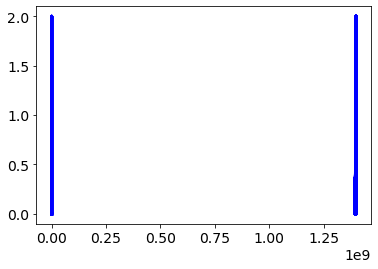

In [35]:
plt.plot(X_test, x_predict, color='blue', linewidth=3)

In [36]:
X_test

,datetime,zone,weatherCondition,humidity,pressure,temperature,windDirection,windSpeed,holiday
26945,1.397140e+09,0.607004,0.000000,0.644444,0.468085,0.472343,0.805556,0.166667,0.5
81923,1.398875e+09,0.887160,0.454545,0.866667,0.510638,0.468868,0.055556,0.250000,1.0
94522,1.399239e+09,0.175097,0.681818,0.788889,0.489362,0.301477,0.916667,0.250000,1.0
8713,1.396579e+09,0.249027,0.409091,0.555556,0.531915,0.357370,0.763889,0.000000,1.0
20838,1.396949e+09,0.607004,0.000000,0.344444,0.425532,0.772951,0.727778,0.166667,0.5
...,...,...,...,...,...,...,...,...,...
55036,1.398051e+09,0.494163,0.409091,0.700000,0.489362,0.643498,0.416667,0.333333,1.0
1711,1.396348e+09,0.871595,0.545455,0.277778,0.425532,0.598610,0.666667,0.333333,0.5
70681,1.398530e+09,0.459144,0.000000,0.411111,0.510638,0.763105,0.083333,0.333333,1.0
36693,1.397446e+09,0.361868,0.000000,0.444444,0.425532,0.869679,0.619444,0.166667,0.5


In [37]:
len(x_predict)

32013

No handles with labels found to put in legend.


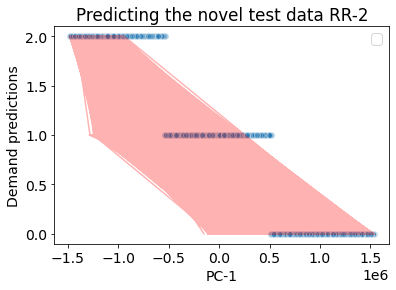

In [41]:
plt.scatter(transformed[0], y_test, edgecolors='w', alpha=0.3)
plt.plot(transformed[0], x_predict, color='r', alpha=0.3)
plt.legend()
plt.xlabel('PC-1')
plt.ylabel('Demand predictions')
plt.title('Predicting the novel test data RR-2')
plt.savefig('LinearRegression/RR-2.png')
plt.show()

In [39]:
print("Training time: = %3d ms" %(endTr-startTr))

Training time: =  55 ms


In [40]:
print("Testing time: = %3d ms" %(endTe-startTe))

Testing time: =   4 ms
